In [1]:
# Installing the required Python packages

# opencv-python-headless: A version of OpenCV without GUI dependencies,
# useful for server environments where display functionality is not required.

# moviepy: A Python library for video editing, which can handle various
# video file formats and perform operations like cutting, concatenating,
# and adding effects.

# imgaug: A library for image augmentation, helpful for creating variations
# of images for machine learning models. It provides numerous techniques for
# modifying images in diverse ways.

# boto3: The Amazon Web Services (AWS) SDK for Python, allowing Python developers
# to write software that makes use of services like Amazon S3 and Amazon EC2.

!pip install opencv-python-headless moviepy imgaug boto3


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing standard Python libraries and installed packages

import os  # Provides a way of using operating system dependent functionality such as reading or writing to the file system.

import cv2  # OpenCV library for computer vision tasks, such as image and video processing.

import imgaug.augmenters as iaa  # Imports the imgaug library and its augmenters module,
                                 # which contains various functions to perform image augmentation.

import boto3  # AWS SDK for Python, allows interaction with AWS services like S3, EC2, etc.

import pandas as pd  # A powerful data manipulation and analysis library for Python, 
                     # often used for working with structured data such as spreadsheets and databases

In [3]:
def resize_video(input_path, output_path, target_resolution=(640, 480)):
    # Function to resize a video to a target resolution

    cap = cv2.VideoCapture(input_path)  # Open the input video file
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Define the codec for the output video
    out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), target_resolution)  
    # Create a VideoWriter object to write the resized video to the output path

    while True:
        ret, frame = cap.read()  # Read each frame from the input video
        if not ret:  # If there are no more frames to read, exit the loop
            break
        frame_resized = cv2.resize(frame, target_resolution)  # Resize the frame to the target resolution
        out.write(frame_resized)  # Write the resized frame to the output video

    cap.release()  # Release the VideoCapture object
    out.release()  # Release the VideoWriter object
    

input_dir = 'C:/Users/KMS/Desktop/Poses'  # Directory containing the original videos
output_dir = 'C:/Users/KMS/Desktop/ResizedVideos'  # Directory to save the resized videos
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it does not exist

# Walk through the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files:
        if filename.endswith('.mp4'):  # Process only .mp4 files
            input_path = os.path.join(subdir, filename)  # Full path to the input video
            relative_path = os.path.relpath(input_path, input_dir)  # Relative path to maintain directory structure
            output_path = os.path.join(output_dir, relative_path)  # Full path for the output video
            os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create necessary directories for output path
            resize_video(input_path, output_path)  # Resize the video and save it to the output path

In [4]:
def extract_frames(video_path, output_dir, frame_rate=1):
    # Function to extract frames from a video at a specified frame rate

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Create the output directory if it does not exist
    
    cap = cv2.VideoCapture(video_path)  # Open the video file
    count = 0  # Initialize frame counter

    while cap.isOpened():  # Loop until the video ends
        ret, frame = cap.read()  # Read each frame from the video
        if not ret:  # If there are no more frames to read, exit the loop
            break
        
        if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) % frame_rate == 0:  # Check if the current frame is at the specified frame rate
            frame_path = os.path.join(output_dir, f"frame_{count}.jpg")  # Define the path for the frame image
            cv2.imwrite(frame_path, frame)  # Save the current frame as an image
            count += 1  # Increment the frame counter

    cap.release()  # Release the VideoCapture object

In [5]:
resized_videos_dir = 'C:/Users/KMS/Desktop/ResizedVideos'  # Directory containing the resized videos
frames_output_dir = 'C:/Users/KMS/Desktop/ExtractedFrames'  # Directory to save the extracted frames
os.makedirs(frames_output_dir, exist_ok=True)  # Create the output directory for frames if it does not exist

# Walk through the resized videos directory
for subdir, _, files in os.walk(resized_videos_dir):
    for filename in files:
        if filename.endswith('.mp4'):  # Process only .mp4 files
            video_path = os.path.join(subdir, filename)  # Full path to the resized video
            relative_path = os.path.relpath(video_path, resized_videos_dir)  # Relative path to maintain directory structure
            video_output_dir = os.path.join(frames_output_dir, os.path.splitext(relative_path)[0])  
            # Full path for the directory to save frames extracted from the current video
            os.makedirs(video_output_dir, exist_ok=True)  # Create necessary directories for the frames output path
            extract_frames(video_path, video_output_dir)  # Extract frames from the video and save them to the output directory

In [27]:
# Required imports
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(exercise_types), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
base_dir = "C:/Users/KMS/Desktop/ExtractedFrames"

# Data and labels lists
data = []
labels = []

# Iterate over exercise types
for i, exercise in enumerate(exercise_types):
    exercise_dir = os.path.join(base_dir, exercise)
    # Traverse through subfolders for each exercise
    for subdir, _, files in os.walk(exercise_dir):
        # Iterate over files in the subfolder
        for filename in files:
            # Check if the file is an image
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Full path to the image file
                filepath = os.path.join(subdir, filename)
                # Load and preprocess the image
                img = tf.keras.preprocessing.image.load_img(filepath, target_size=(224, 224))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                img_array = img_array / 255.0  # Normalize pixel values
                # Append the image data and label
                data.append(img_array)
                labels.append(i)  # Use i directly since exercise_types is already indexed from 0

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_acc)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.6263 - loss: 1.4990 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9980 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 1.6445e-05
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 1.0000 - loss: 6.9438e-04 - val_accuracy: 1.0000 - val_loss: 1.2028e-06
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 8.4199e-06
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 3.5044e-04 - val_accuracy: 1.0000 - val_loss: 8.5987e-07
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 2.9733e-04 - val_accuracy: 1.0000 - val_loss: 3.1044e-08
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 2.1228e-04 - val_accuracy: 1.0000 - val_loss: 1.5607e-06
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 

In [31]:
model.save("exercise_classification_model.h5")
print("Model saved successfully.")

Model saved successfully.


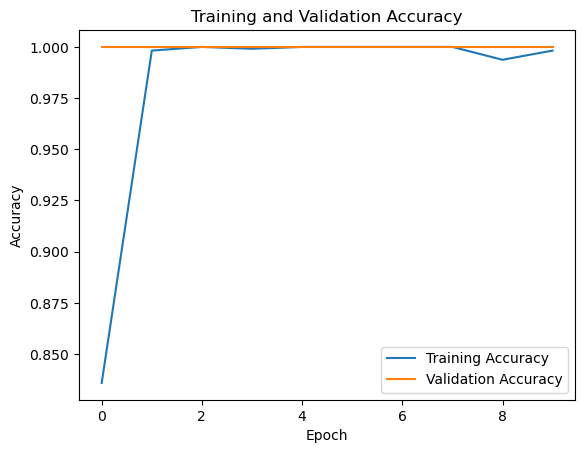

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

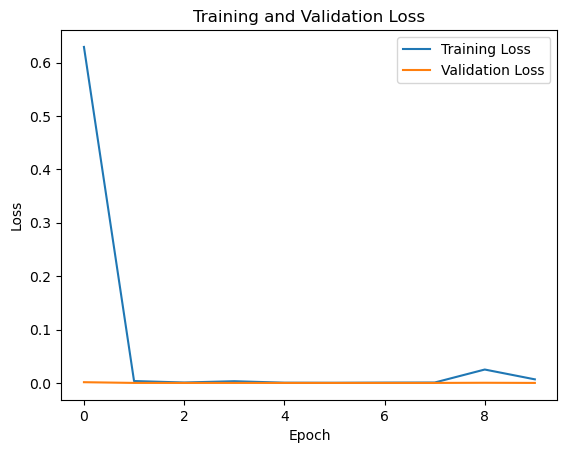

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import f1_score

# Predict on test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate F1 score
f1score = f1_score(test_labels, predicted_classes, average='weighted')
print("F1 Score:", f1score)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step
F1 Score: 1.0


In [103]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("exercise_classification_model.h5")

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Resize frame to match model input shape
    resized_frame = cv2.resize(frame, (224, 224))
    # Normalize pixel values
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Function to predict exercise from a single frame
def predict_exercise(frame):
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    # Expand dimensions to match the input shape of the model
    input_data = np.expand_dims(preprocessed_frame, axis=0)
    # Predict probabilities
    predictions = model.predict(input_data)
    # Get the exercise type with highest probability
    predicted_index = np.argmax(predictions)
    exercise = exercise_types[predicted_index]
    # Get the confidence (probability) of the prediction
    confidence = predictions[0][predicted_index] * 100  # Convert to percentage
    return exercise, confidence

# Path to the input video
video_path = r"C:\Users\KMS\Desktop\Poses\Squat\squat_27.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Variables to store aggregated predictions
predicted_exercises = []
total_confidence = 0.0
frames_to_iterate = 60  # Number of frames to iterate

# Loop through specified number of frames in the video
for _ in range(frames_to_iterate):
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no more frames
    
    # Predict exercise for the current frame
    exercise, confidence = predict_exercise(frame)
    
    # Aggregate predictions
    total_confidence += confidence
    predicted_exercises.append(exercise)

# Calculate average confidence
average_confidence = total_confidence / frames_to_iterate

# Release the video capture object
cap.release()

# Display the predicted exercise and average confidence
print("Predicted Exercise:", predicted_exercises[0])  # Just print the first predicted exercise
print("Accuracy: {:.2f}%".format(average_confidence))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━

In [116]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("exercise_classification_model.h5")

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Resize frame to match model input shape
    resized_frame = cv2.resize(frame, (224, 224))
    # Normalize pixel values
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Function to predict exercise from a single frame
def predict_exercise(frame):
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    # Expand dimensions to match the input shape of the model
    input_data = np.expand_dims(preprocessed_frame, axis=0)
    # Predict probabilities
    predictions = model.predict(input_data)
    # Get the exercise type with highest probability
    predicted_index = np.argmax(predictions)
    exercise = exercise_types[predicted_index]
    # Get the confidence (probability) of the prediction
    confidence = predictions[0][predicted_index] * 100  # Convert to percentage
    return exercise, confidence

# Path to the input video
video_path = r"C:\Users\KMS\Desktop\Poses\Hammer Curl\hammer curl_16.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Variables to store aggregated predictions
predicted_exercises = []
total_confidence = 0.0
frames_to_iterate = 60  # Number of frames to iterate

# Loop through specified number of frames in the video
for _ in range(frames_to_iterate):
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no more frames
    
    # Predict exercise for the current frame
    exercise, confidence = predict_exercise(frame)
    
    # Aggregate predictions
    total_confidence += confidence
    predicted_exercises.append(exercise)

# Calculate average confidence
average_confidence = total_confidence / frames_to_iterate

# Release the video capture object
cap.release()

# Display the predicted exercise and average confidence
print("Predicted Exercise:", predicted_exercises[0])  # Just print the first predicted exercise
print("Accuracy: {:.2f}%".format(average_confidence))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━

In [131]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("exercise_classification_model.h5")

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Resize frame to match model input shape
    resized_frame = cv2.resize(frame, (224, 224))
    # Normalize pixel values
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Function to predict exercise from a single frame
def predict_exercise(frame):
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    # Expand dimensions to match the input shape of the model
    input_data = np.expand_dims(preprocessed_frame, axis=0)
    # Predict probabilities
    predictions = model.predict(input_data)
    # Get the exercise type with highest probability
    predicted_index = np.argmax(predictions)
    exercise = exercise_types[predicted_index]
    # Get the confidence (probability) of the prediction
    confidence = predictions[0][predicted_index] * 100  # Convert to percentage
    return exercise, confidence

# Path to the input video
video_path = r"C:\Users\KMS\Desktop\Poses\Russian Twist\russian twist_13.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Variables to store aggregated predictions
predicted_exercises = []
total_confidence = 0.0
frames_to_iterate = 40  # Number of frames to iterate

# Loop through specified number of frames in the video
for _ in range(frames_to_iterate):
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no more frames
    
    # Predict exercise for the current frame
    exercise, confidence = predict_exercise(frame)
    
    # Aggregate predictions
    total_confidence += confidence
    predicted_exercises.append(exercise)

# Calculate average confidence
average_confidence = total_confidence / frames_to_iterate

# Release the video capture object
cap.release()

# Display the predicted exercise and average confidence
print("Predicted Exercise:", predicted_exercises[0])  # Just print the first predicted exercise
print("Accuracy: {:.2f}%".format(average_confidence))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━

In [166]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("exercise_classification_model.h5")

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Resize frame to match model input shape
    resized_frame = cv2.resize(frame, (224, 224))
    # Normalize pixel values
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Function to predict exercise from a single frame
def predict_exercise(frame):
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    # Expand dimensions to match the input shape of the model
    input_data = np.expand_dims(preprocessed_frame, axis=0)
    # Predict probabilities
    predictions = model.predict(input_data)
    # Get the exercise type with highest probability
    predicted_index = np.argmax(predictions)
    exercise = exercise_types[predicted_index]
    # Get the confidence (probability) of the prediction
    confidence = predictions[0][predicted_index] * 100  # Convert to percentage
    return exercise, confidence

# Path to the input video
video_path = r"C:\Users\KMS\Desktop\Poses\Lateral Raise\lateral raise_9.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Variables to store aggregated predictions
predicted_exercises = []
total_confidence = 0.0
frames_to_iterate = 20  # Number of frames to iterate

# Loop through specified number of frames in the video
for _ in range(frames_to_iterate):
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no more frames
    
    # Predict exercise for the current frame
    exercise, confidence = predict_exercise(frame)
    
    # Aggregate predictions
    total_confidence += confidence
    predicted_exercises.append(exercise)

# Calculate average confidence
average_confidence = total_confidence / frames_to_iterate

# Release the video capture object
cap.release()

# Display the predicted exercise and average confidence
print("Predicted Exercise:", predicted_exercises[0])  # Just print the first predicted exercise
print("Accuracy: {:.2f}%".format(average_confidence))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Exercise: Lateral Raise
Accuracy: 98.05%


In [223]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("exercise_classification_model.h5")

# Define exercise types
exercise_types = ['Squat', 'PushUp', 'Lateral Raise', 'Hammer Curl', 'Russian Twist']

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Resize frame to match model input shape
    resized_frame = cv2.resize(frame, (224, 224))
    # Normalize pixel values
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Function to predict exercises from the entire video
def predict_exercises(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Variables to store predicted exercises and confidence
    predicted_exercises = []
    total_confidence = 0.0
    frame_count = 0

    # Loop through all frames in the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no more frames

        # Preprocess the frame
        preprocessed_frame = preprocess_frame(frame)
        # Expand dimensions to match the input shape of the model
        input_data = np.expand_dims(preprocessed_frame, axis=0)
        # Predict probabilities
        predictions = model.predict(input_data)
        # Get the exercise type with highest probability
        predicted_index = np.argmax(predictions)
        exercise = exercise_types[predicted_index]
        # Get the confidence (probability) of the prediction
        confidence = predictions[0][predicted_index] * 100  # Convert to percentage
        
        # Aggregate predictions
        total_confidence += confidence
        predicted_exercises.append(exercise)
        frame_count += 1

    # Calculate average confidence
    average_confidence = total_confidence / frame_count

    # Release the video capture object
    cap.release()

    return predicted_exercises, average_confidence

# Path to the input video
video_path = r"C:\Users\KMS\Desktop\Poses\PushUp\push-up_3.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Variables to store aggregated predictions
predicted_exercises = []
total_confidence = 0.0
frames_to_iterate = 25  # Number of frames to iterate

# Loop through specified number of frames in the video
for _ in range(frames_to_iterate):
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no more frames
    
    # Predict exercise for the current frame
    exercise, confidence = predict_exercise(frame)
    
    # Aggregate predictions
    total_confidence += confidence
    predicted_exercises.append(exercise)

# Calculate average confidence
average_confidence = total_confidence / frames_to_iterate

# Release the video capture object
cap.release()

# Display the predicted exercise and average confidence
print("Predicted Exercise:", predicted_exercises[1])  
print("Accuracy: {:.2f}%".format(average_confidence))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Exercise: PushUp
Accuracy: 88.98%
